In [1]:
import torch
import gpytorch

import pickle

import numpy as np

import os

%matplotlib inline
from matplotlib import pyplot as plt

plt.style.use("ggplot")
plt.rc('font', family="serif")

In [2]:
SAVE_FIGS = False

In [7]:
result_path = os.path.join('..','script')
print(result_path)

..\script


In [10]:
bayesopt_results = []
for i in [1,3,4,5,6]:
    with open(os.path.join(result_path,'bayesopt_result_%d.p' % i),'rb') as fid:
        bayesopt_results.append(pickle.load(fid))

tensor([[7.2383e-06, 1.1886e-04, 7.0149e-01],
        [8.2824e-06, 1.2172e-04, 7.2492e-01],
        [7.5786e-06, 1.2218e-04, 7.1187e-01],
        [8.1564e-06, 1.1955e-04, 7.2164e-01],
        [5.6641e-06, 1.1805e-04, 6.9165e-01],
        [6.3085e-06, 1.2296e-04, 6.8715e-01],
        [8.6024e-06, 1.2097e-04, 7.0590e-01],
        [6.6143e-06, 1.2035e-04, 6.9590e-01],
        [7.9045e-06, 1.1860e-04, 7.1729e-01],
        [6.1965e-06, 1.1743e-04, 6.9937e-01],
        [8.9187e-06, 1.2309e-04, 6.8324e-01],
        [8.9187e-06, 1.2309e-04, 6.8896e-01],
        [8.9187e-06, 1.1810e-04, 7.0876e-01],
        [8.9187e-06, 1.1722e-04, 7.1448e-01],
        [5.6006e-06, 1.2309e-04, 7.0348e-01],
        [8.9187e-06, 1.2309e-04, 7.1932e-01],
        [8.9187e-06, 1.2309e-04, 6.9380e-01],
        [8.9187e-06, 1.2309e-04, 7.2680e-01],
        [8.9187e-06, 1.2309e-04, 6.9776e-01],
        [8.9187e-06, 1.2309e-04, 6.8544e-01],
        [5.9358e-06, 1.1691e-04, 7.2328e-01],
        [5.8017e-06, 1.2272e-04, 7

In [20]:
with open(os.path.join(result_path, 'ground_truth.p'),'rb') as fid:
    ground_truth = pickle.load(fid)

In [22]:
ground_truth[0]

{'a': array([6.6001335e-06], dtype=float32),
 'b': array([0.00011894], dtype=float32),
 'k': array([0.7229773], dtype=float32)}

In [23]:
priors = {
    'a': [5.6006147e-6, 8.9186578e-6],
    'b': [1.1691e-4, 1.2309e-4],
    'k': [6.832446e-1, 7.2680455e-1]
}

In [28]:
abs_diff = lambda x: [np.abs(ground_truth[0][k]-x[i])[0] for i,k in enumerate(['a','b','k'])]

def rel_diff(x):
    out = []
    x_ = abs_diff(x)
    for i,k in enumerate(['a','b','k']):
        out.append(x_[i]/(priors[k][1]-priors[k][0]))
    return out

In [54]:
for i,(xres, yres) in enumerate(bayesopt_results):
    print('{} ℓ='.format(i) + '%8.6f'% yres.min().item() + ' N={}'.format(len(yres)))
    x = xres[yres.argmin(),:].numpy()
    print('x : {}'.format(x * np.array([1e6, 1e4, 1])))
    print('|x-̃x| x [10^7, 10^6, 1]: {}'.format(abs_diff(x)*np.array([1e7, 1e6, 1])))
    print('|x-̃x|norm : {}'.format(rel_diff(x)))
    print('abs err : {}'.format(np.linalg.norm(rel_diff(x))))
    print('----')

0 ℓ=88.761688 N=50
x : [6.47201978 1.22902726 0.70964456]
|x-̃x| x [10^7, 10^6, 1]: [1.28113697 3.96012183 0.01333272]
|x-̃x|norm : [0.038611221604833615, 0.6407964126957434, 0.3060775912559134]
abs err : 0.7111922108871644
----
1 ℓ=82.481628 N=150
x : [6.43850444 1.18345757 0.69996458]
|x-̃x| x [10^7, 10^6, 1]: [1.61629032 0.5968468  0.0230127 ]
|x-̃x|norm : [0.048712155648663026, 0.09657715260379739, 0.5282994515991359]
abs err : 0.5392590574788193
----
2 ℓ=-390231744.000000 N=10
x : [8.91865784 1.1691     0.68946743]
|x-̃x| x [10^7, 10^6, 1]: [23.18524366  2.03260424  0.03350985]
|x-̃x|norm : [0.6987625827626462, 0.3289003629677464, 0.7692811975682743]
abs err : 1.0900633728189923
----
3 ℓ=84.816109 N=35
x : [6.74054763 1.19549441 0.7240513 ]
|x-̃x| x [10^7, 10^6, 1]: [1.40414159e+00 6.06836693e-01 1.07401609e-03]
|x-̃x|norm : [0.04231836485867741, 0.09819363962714268, 0.024656045156336574]
abs err : 0.1097303760600893
----
4 ℓ=85.474777 N=35
x : [6.50553557 1.1691     0.71008456]
|

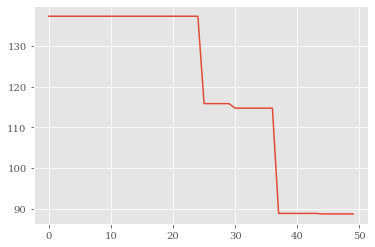

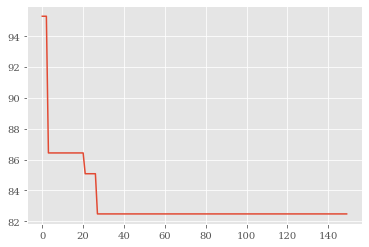

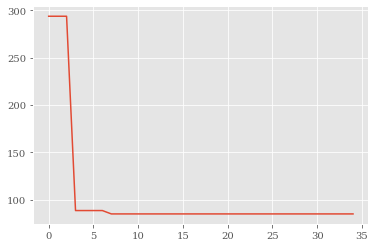

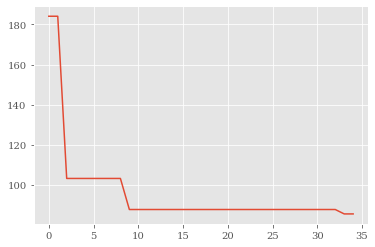

In [66]:
for j in [0,1,3,4]:
    xx, yy = bayesopt_results[j]
    plt.figure()
    afrplt.plot([yy[0], *[yy[:i].min() for i in range(1, len(yy))]])    
#     plt.plot([*yy[:5], *[yy[:i].min() for i in range(5, len(yy))]])

In [50]:
ground_truth[0]['k']

array([0.7229773], dtype=float32)

In [32]:
bayesopt_deriv_results = []
for i in [1,2,3,4]:
    with open(os.path.join(result_path,'bayesopt_deriv_result_%d.p' % i),'rb') as fid:
        bayesopt_deriv_results.append(pickle.load(fid))

In [56]:
for i,(xres, yres) in enumerate(bayesopt_deriv_results):
    print('{} ℓ='.format(i) + '%8.6f'% yres[:,0].min().item() + ' N={}'.format(len(yres)))
    x = xres[yres[:,0].argmin(),:].numpy()
    print('x : {}'.format(x * np.array([1e6, 1e4, 1])))
    print('|x-̃x| x [10^7, 10^6, 1]: {}'.format(abs_diff(x)*np.array([1e7, 1e6, 1])))
    print('|x-̃x|norm : {}'.format(rel_diff(x)))
    print('abs err : {}'.format(np.linalg.norm(rel_diff(x))))
    print('----')

0 ℓ=87.590874 N=15
x : [6.88309638 1.2053769  0.69310367]
|x-̃x| x [10^7, 10^6, 1]: [2.82962901 1.59508636 0.02987361]
|x-̃x|norm : [0.08528005591919381, 0.25810458897808963, 0.685804495708711]
abs err : 0.7377116463249098
----
1 ℓ=87.502327 N=15
x : [6.27414602 1.1864971  0.70837474]
|x-̃x| x [10^7, 10^6, 1]: [3.25987457 0.29289367 0.01460254]
|x-̃x|norm : [0.09824690266150109, 0.0473937983428729, 0.3352286199484376]
abs err : 0.3525292238048888
----
2 ℓ=88.314262 N=15
x : [6.71255202 1.19112228 0.69141048]
|x-̃x| x [10^7, 10^6, 1]: [1.12418547 0.1696244  0.0315668 ]
|x-̃x|norm : [0.033880978628636156, 0.027447313893116283, 0.7246748145252966]
abs err : 0.7259854423885195
----
3 ℓ=84.415161 N=15
x : [6.51841947 1.2256176  0.6977455 ]
|x-̃x| x [10^7, 10^6, 1]: [0.81714006 3.6191559  0.02523178]
|x-̃x|norm : [0.02462716841385804, 0.5856239328064449, 0.5792425983425963]
abs err : 0.8240654560375981
----


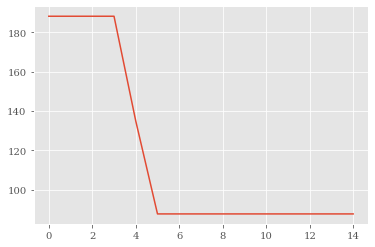

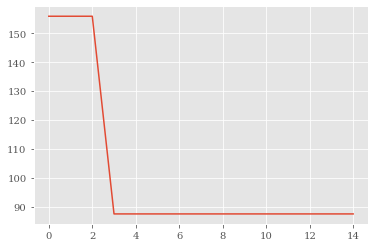

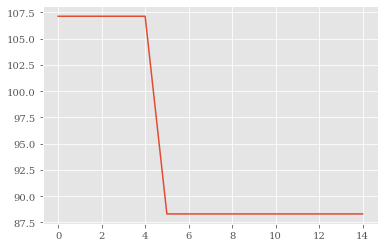

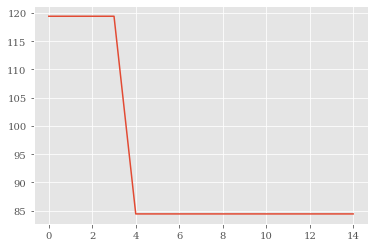

In [68]:
for j in range(4):
    xx, yy = bayesopt_deriv_results[j]
    plt.figure()
    plt.plot([yy[0,0], *[yy[:i,0].min() for i in range(1, yy.shape[0])]])    
#     plt.plot([*yy[:5], *[yy[:i].min() for i in range(5, len(yy))]])

In [36]:
lbfgs_results = []
for i in [1,2,3,4]:
    with open(os.path.join(result_path,'lbfgs_result_%d.p' % i),'rb') as fid:
        lbfgs_results.append(pickle.load(fid))

In [57]:
for i,opt in enumerate(lbfgs_results):
    yres, N = opt.fun, opt.nfev
    print('{} ℓ='.format(i) + '%8.6f'% yres + ' N={}'.format(N))
    x = opt.x
    print('x : {}'.format(x * np.array([1e6, 1e4, 1])))
    print('|x-̃x| x [10^7, 10^6, 1]: {}'.format(abs_diff(x)*np.array([1e7, 1e6, 1])))
    print('|x-̃x|norm : {}'.format(rel_diff(x)))
    print('abs err : {}'.format(np.linalg.norm(rel_diff(x))))
    print('----')

0 ℓ=79.754524 N=29
x : [6.5394551  1.20306634 0.6946165 ]
|x-̃x| x [10^7, 10^6, 1]: [0.60678303 1.36403105 0.02836078]
|x-̃x|norm : [0.018287376457175483, 0.22071699836384862, 0.6510747614219594]
abs err : 0.6877127063426232
----
1 ℓ=71.156151 N=27
x : [6.58837247 1.2194947  0.70973711]
|x-̃x| x [10^7, 10^6, 1]: [0.11761131 3.00686952 0.01324016]
|x-̃x|norm : [0.0035445985424290057, 0.4865484659538939, 0.30395256555372174]
abs err : 0.5736977741002696
----
2 ℓ=85.834999 N=62
x : [6.55765347 1.20451335 0.70229738]
|x-̃x| x [10^7, 10^6, 1]: [0.42480224 1.50872802 0.02067989]
|x-̃x|norm : [0.012802794449252043, 0.24413074740483018, 0.47474551989767083]
abs err : 0.5339916123283778
----
3 ℓ=88.202744 N=131
x : [6.6579748  1.22099649 0.72200469]
|x-̃x| x [10^7, 10^6, 1]: [5.78411345e-01 3.15704528e+00 9.72568989e-04]
|x-̃x|norm : [0.017432303561292772, 0.5108487515779628, 0.022327137400296567]
abs err : 0.511633495053547
----


In [38]:
lbfgs_results.fun

[      fun: 79.75452423095703
  hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
       jac: array([7557599.5     , -178116.609375, -178116.609375])
   message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
      nfev: 29
       nit: 4
    status: 0
   success: True
         x: array([6.53945510e-06, 1.20306634e-04, 6.94616500e-01]),
       fun: 71.1561508178711
  hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
       jac: array([-11482.21289062,   4307.34277344,   4307.34277344])
   message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
      nfev: 27
       nit: 5
    status: 0
   success: True
         x: array([6.58837247e-06, 1.21949470e-04, 7.09737111e-01]),
       fun: 85.83499908447266
  hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
       jac: array([-134196.4375    ,   24062.58984375,   24062.58984375])
   message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
      nfev: 62
       nit: 5
    status: 0
   success: True
         x: array([6